<div >
<img src = "../banner.jpg" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_202501/blob/main/Modulo05/CuadernoModulo05_Boosting.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Boosting Trees

Cargamos los paquetes

In [ ]:
# install.packages("pacman") #run this line if you use Google Colab

In [1]:
#packages
require("pacman")
p_load("tidyverse","ggplot2","rpart")

Loading required package: pacman



## Motivation: Toy Example

In [2]:

db<-read.csv("https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/boosting_tree_toy.csv")
head(db)

y<-db$y
x<-db$x

,X,x,y
,<int>,<dbl>,<dbl>
1,1,0.08216883,0.19462317
2,2,0.08413394,0.07939476
3,3,0.14659427,0.06655269
4,4,0.17459164,-0.05863454
5,5,0.22330805,-0.15040834
6,6,0.29192236,0.01899571


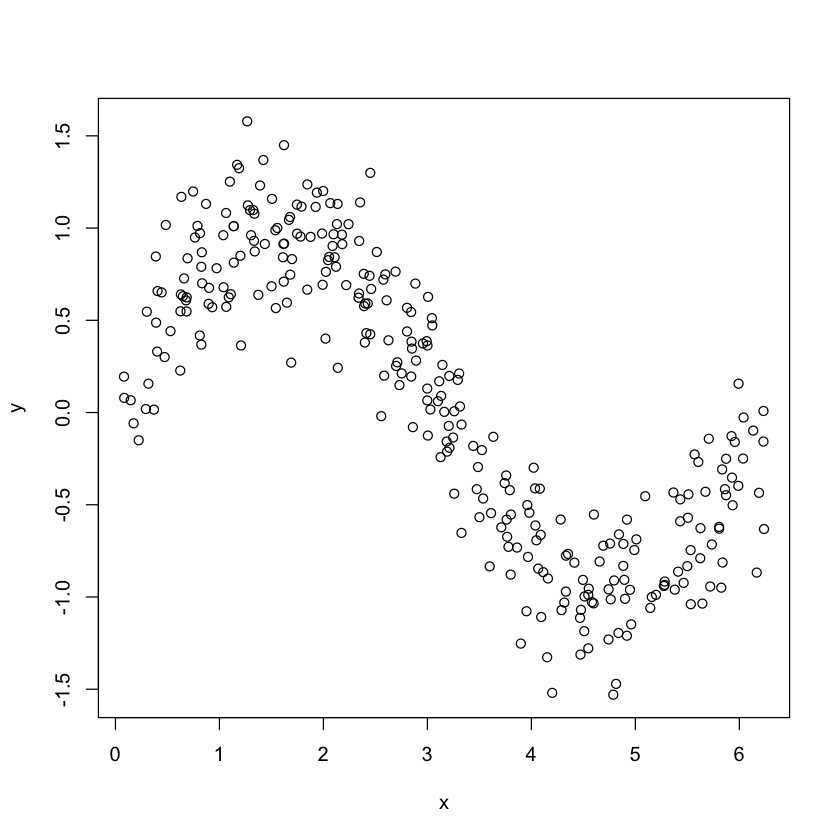

In [3]:
plot(x,y)

## Algoritmo



<small>

1. Iniciamos fijando $\hat{f}(x) = 0$ y $r_i = y_i$ para todos los $i$ del *training set*  
2. Para $m = 1, 2, \dots, M$  
    a. Ajustamos un árbol $\hat{f}^m(x)$ con $J$ bifurcaciones  
    b. Actualizamos $\hat{f}(x)$  
    $$
    \hat{f}(x) \leftarrow \hat{f}(x) + \lambda \hat{f}^m(x)
    $$  
c. Actualizamos los residuales  
    $$
    r_i \leftarrow r_i - \lambda \hat{f}^m(x)
    $$  
3. El modelo final es  
    $$
    \hat{f}_{boost} = \sum_{m=1}^M \lambda \hat{f}^m(x)
    $$



</small>


### Hiperparámetros

In [4]:
lambda<-.01

In [5]:
J<-1 #stump

In [ ]:
# What else?

### Iniciamos

In [6]:

fhat=rep(0,length(y))

r=y

In [7]:
head(y)

[1]  0.19462317  0.07939476  0.06655269 -0.05863454 -0.15040834  0.01899571

In [8]:
head(r)

[1]  0.19462317  0.07939476  0.06655269 -0.05863454 -0.15040834  0.01899571

###  Primera iteración

In [9]:
fit1<-rpart(r ~ x, control = list(maxdepth = J))
yhat1<-predict(fit1,newdata=data.frame(x))

head(lambda *yhat1)

1           2           3           4           5           6 
0.006803402 0.006803402 0.006803402 0.006803402 0.006803402 0.006803402

In [12]:
f1<-fhat + lambda *yhat1

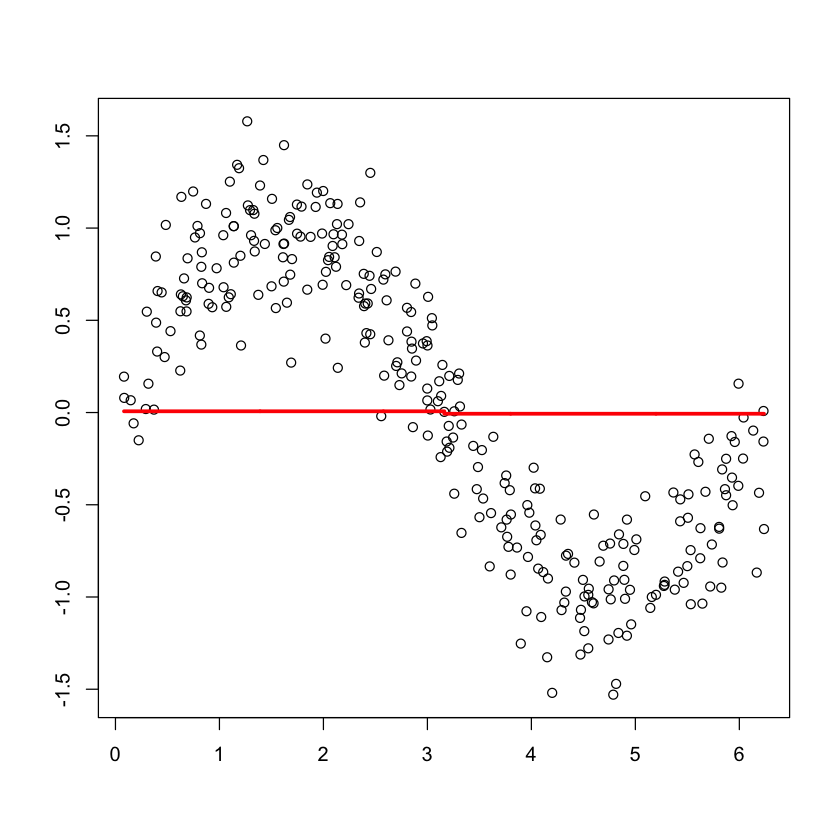

In [13]:
plot(x,y,ylab="",xlab="")
lines(x,f1,type="s",col="red",lwd=3)

In [14]:
r1<- r - lambda*yhat1

In [ ]:
### Segunda Iteracion

In [15]:

fit2<-rpart(r1 ~ x, control = list(maxdepth = J))
yhat2<-predict(fit2,newdata=data.frame(x))
f2<- f1 + lambda *yhat2

head(lambda *yhat2)

1           2           3           4           5           6 
0.006735368 0.006735368 0.006735368 0.006735368 0.006735368 0.006735368

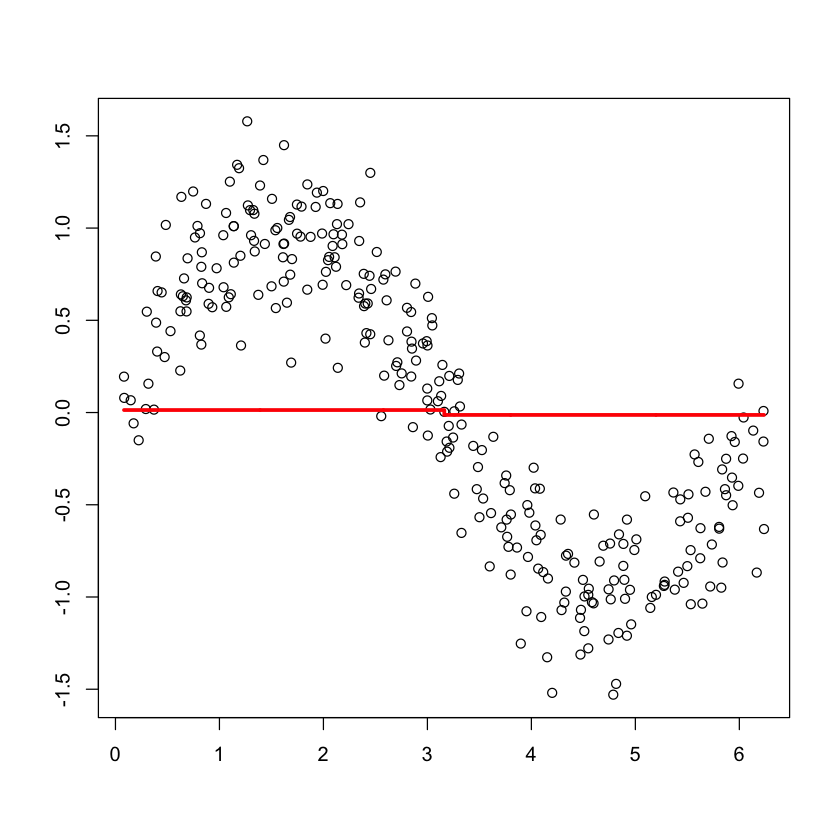

In [16]:
plot(x,y,ylab="",xlab="")
lines(x,f2,type="s",col="red",lwd=3)

# El algoritmo Completo

In [19]:
M<- 1000

# En un loop
fhat<-rep(0,length(y))

r = y

YP<-lambda*fhat

for(t in 1:M){
  fit <- rpart(r~x, control = list(maxdepth = 1))
  yhat<- predict(fit,newdata=data.frame(x))
  r <-  r - lambda*yhat
  YP <-  cbind(YP,lambda*yhat)}

head(YP)

,YP,,,,,,,,,,⋯,,,,,,,,,,
1,0,0.006803402,0.006735368,0.006627889,0.006724171,0.006497559,0.006591954,0.006369791,0.005899604,0.00640334,⋯,-0.0001010494,-0.0006957578,0.0004021779,-6.545139e-05,0.0001999535,-0.0001193059,-0.0009580903,0.0003996678,-0.0006919508,0.0001991365
2,0,0.006803402,0.006735368,0.006627889,0.006724171,0.006497559,0.006591954,0.006369791,0.005899604,0.00640334,⋯,-0.0001010494,-0.0006957578,0.0004021779,-6.545139e-05,0.0001999535,-0.0001193059,-0.0009580903,0.0003996678,-0.0006919508,0.0001991365
3,0,0.006803402,0.006735368,0.006627889,0.006724171,0.006497559,0.006591954,0.006369791,0.005899604,0.00640334,⋯,-0.0001010494,-0.0006957578,0.0004021779,-6.545139e-05,0.0001999535,-0.0001193059,-0.0009580903,0.0003996678,-0.0006919508,0.0001991365
4,0,0.006803402,0.006735368,0.006627889,0.006724171,0.006497559,0.006591954,0.006369791,0.005899604,0.00640334,⋯,-0.0001010494,-0.0006957578,0.0004021779,-6.545139e-05,0.0001999535,-0.0001193059,-0.0009580903,0.0003996678,-0.0006919508,0.0001991365
5,0,0.006803402,0.006735368,0.006627889,0.006724171,0.006497559,0.006591954,0.006369791,0.005899604,0.00640334,⋯,-0.0001010494,-0.0006957578,0.0004021779,-6.545139e-05,0.0001999535,-0.0001193059,-0.0009580903,0.0003996678,-0.0006919508,0.0001991365
6,0,0.006803402,0.006735368,0.006627889,0.006724171,0.006497559,0.006591954,0.006369791,0.005899604,0.00640334,⋯,-0.0001010494,-0.0006957578,0.0004021779,-6.545139e-05,0.0001999535,-0.0001193059,-0.0009580903,0.0003996678,-0.0006919508,0.0001991365


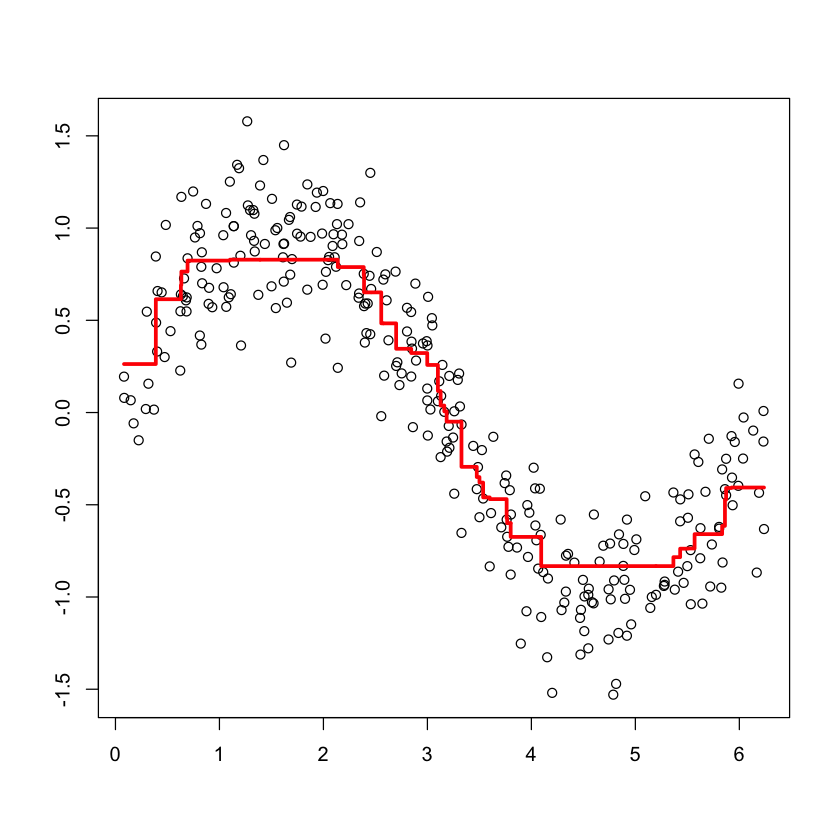

In [20]:
fhat<-apply(YP[,1:M],1,sum)

plot(x,y,ylab="",xlab="")
lines(x,fhat,type="s",col="red",lwd=3)

## Gradient Boosting en el Ames Data Set


Este conjunto de datos contiene información detallada sobre las características de viviendas en Ames, Iowa, y su precio de venta. Incluye más de 80 variables que describen aspectos físicos, de ubicación y de calidad de las propiedades, como el tamaño habitable, el tipo de edificio, el año de construcción, el número de baños, y si tiene garaje o cercado, entre otros.

Es ampliamente utilizado en ciencia de datos y machine learning como un caso realista para problemas de regresión.  
La descripción completa de las variables puede consultarse aquí:  
https://jse.amstat.org/v19n3/decock/DataDocumentation.txt


In [ ]:
p_load("modeldata")

data("ames", package = "modeldata")

En este ejemplo, vamos a usar Gradient Boosting Machines (GBM) para modelar el precio de venta de las viviendas a partir de algunas de sus características. 

Primero cargamos los paquetes necesarios. caret nos permite entrenar y validar modelos de manera unificada, mientras que gbm implementa el algoritmo de Gradient Boosting Machines que usaremos en este ejercicio.

In [ ]:
p_load("caret")
p_load('gbm')

El rendimiento del modelo GBM depende fuertemente de la elección de sus hiperparámetros:

- n.trees (# Boosting Iterations) $M$
- interaction.depth (Max Tree Depth) $J$
- shrinkage (Shrinkage) $\lambda$
- n.minobsinnode (Min. Terminal Node Size) 

Definimos la grilla de entrenamiento de los hiperparámetros

In [ ]:
grid_gbm<-expand.grid(n.trees=c(200,300,500),
                      interaction.depth=c(4,6),
                      shrinkage=c(0.001,0.01),
                      n.minobsinnode = c(10,30))


grid_gbm


In [ ]:
fitControl<-trainControl(method ="cv",
                         number=5)


set.seed(1011)
gbm_tree <- train( log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence,
    data=ames,
  method = "gbm", 
  trControl = fitControl,
  tuneGrid=grid_gbm,
  verbose = FALSE
)            


In [ ]:
gbm_tree

## Xgboost


\begin{align}
\mathcal{L}=\sum_{i=1}^{N}L(y_{i},\sum_{m=1}^{M}T(x_{i};\Theta_{m}))+\sum_{m=1}^{M}\left(\zeta J+\frac{1}{2}\varphi\sum_{j=1}^{J}\gamma_{j}^{2} \right)
\end{align}


﻿Para entrenar modelos con **XGBoost**, primero cargamos el paquete correspondiente: `xgboost`.

In [ ]:
p_load('xgboost')

R nos permite "tunear" los siguientes hiperparámetros:

- `nrounds`: número de árboles (o iteraciones) en el modelo.
- `max_depth`: profundidad máxima de cada árbol, controla la complejidad del modelo.
- `eta`: tasa de aprendizaje (*shrinkage*), regula cuánto ajusta cada árbol.
- `min_child_weight`: número mínimo de observaciones por nodo terminal.
- `colsample_bytree`: fracción de columnas que se usan al construir cada árbol.
- `subsample`: fracción de observaciones que se usan al construir cada árbol.

Notemos que la formulación teórica del modelo incluye más parámetros (como el número de ramas o la regularización L1), **no todos ellos están disponibles o son fácilmente tuneables a través de la interfaz de `caret` en R**. 

In [ ]:
grid_xbgoost <- expand.grid(nrounds = c(250),
                            max_depth = c(4), 
                            eta = c(0.01), 
                            gamma = c(0), 
                            min_child_weight = c(10, 25),
                            colsample_bytree = c(0.33,0.66),
                            subsample = c(0.4))

grid_xbgoost

In [ ]:
set.seed(1011)

Xgboost_tree <- train(log(Sale_Price) ~ Gr_Liv_Area  + Bldg_Type + Fence,
    data=ames,
  method = "xgbTree", 
  trControl = fitControl,
  tuneGrid=grid_xbgoost
)        

Xgboost_tree


Es importante tener en cuenta que **nunca existe una única elección óptima de hiperparámetros que funcione bien en todos (o incluso en la mayoría) de los casos**. De hecho, la elección de un hiperparámetro suele influir de manera significativa en el valor óptimo de otros hiperparámetros. Generalmente, hay compensaciones importantes que considerar entre los distintos valores posibles.

Por ejemplo, en el caso de **XGBoost**, un valor alto de `min_child_weight` puede requerir una reducción en `eta` o en `max_depth` para lograr un buen desempeño. 

Este tipo de interdependencia también se presenta en varios algoritmos de ML.

